In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('./advertising/Advertising Budget and Sales.csv')
print(data)

     Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
0             1             230.1                 37.8   
1             2              44.5                 39.3   
2             3              17.2                 45.9   
3             4             151.5                 41.3   
4             5             180.8                 10.8   
..          ...               ...                  ...   
195         196              38.2                  3.7   
196         197              94.2                  4.9   
197         198             177.0                  9.3   
198         199             283.6                 42.0   
199         200             232.1                  8.6   

     Newspaper Ad Budget ($)  Sales ($)  
0                       69.2       22.1  
1                       45.1       10.4  
2                       69.3        9.3  
3                       58.5       18.5  
4                       58.4       12.9  
..                       ...        ...  
195      

In [3]:
data.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [4]:
data["Sales ($)"].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, x, y, name):
        self.x = x
        self.y = y
        self.xmean = np.mean(x)
        self.ymean = np.mean(y)
        self.B1 = self.calculateB1()
        self.B0 = self.calculateB0()
        self.name = name

    def calculateB1(self):
        # Calculate B1 (slope)
        numerator = np.sum((self.x - self.xmean) * (self.y - self.ymean))
        denominator = np.sum((self.x - self.xmean) ** 2)
        return numerator / denominator

    def calculateB0(self):
        # Calculate B0 (intercept)
        return self.ymean - self.B1 * self.xmean

    def predict(self, X):
        # Prediction formula: y = B0 + B1 * x
        return self.B0 + self.B1 * X

    def regression_line(self):
        # Print the regression line equation
        print(f"Regression Line: y = {self.B0} + {self.B1} * x")

    def rmse(self, y_pred):
        # Calculate RMSE
        return np.sqrt(np.mean((self.y - y_pred) ** 2))

    def plot(self, y_pred):
        # Plot the regression line and data points
        plt.scatter(self.x, self.y, color='blue', label='Data points')
        plt.plot(self.x, y_pred, color='red', label='Regression Line')
        plt.xlabel(f"{self.name}")
        plt.ylabel("Sales")
        plt.legend()
        plt.show()



Regression Line: y = 9.311638095158283 + 0.2024957833924397 * x


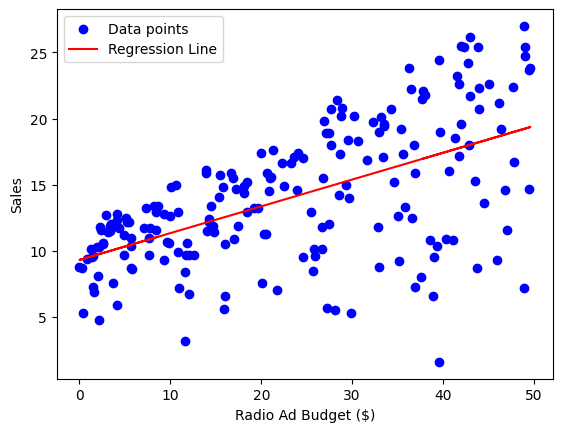

RMSE for Radio: 4.2535159274564185
Actual Sales (first 5 for Radio): [22.1 10.4  9.3 18.5 12.9]
Predicted Sales (first 5 for Radio): [16.96597871 17.26972238 18.60619455 17.67471395 11.49859256]


In [32]:
#Q1 linear regression for sakes wrt radio
# Assuming 'data' is your pandas DataFrame
radio = data["Radio Ad Budget ($)"].values  # Convert pandas column to numpy array
sales = data["Sales ($)"].values  # Convert pandas column to numpy array

# Create the LinearRegression object for Radio
radiomodel = LinearRegression(radio, sales, "Radio Ad Budget ($)")

# Print the regression line equation for Radio
radiomodel.regression_line()

# Make predictions for Radio
radio_pred = radiomodel.predict(radio)

# Plot the regression line and data points for Radio
radiomodel.plot(radio_pred)

# Calculate and print RMSE for Radio
print(f"RMSE for Radio: {radiomodel.rmse(radio_pred)}")

# Print actual sales and predicted sales for Radio
print("Actual Sales (first 5 for Radio):", sales[:5])
print("Predicted Sales (first 5 for Radio):", radio_pred[:5])


Regression Line: y = 7.0325935491276965 + 0.047536640433019736 * x


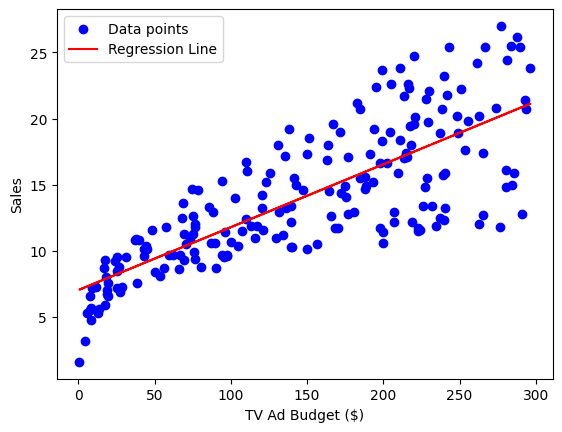

RMSE for TV: 3.2423221486546887
Actual Sales (first 5 for TV): [22.1 10.4  9.3 18.5 12.9]
Predicted Sales (first 5 for TV): [17.97077451  9.14797405  7.85022376 14.23439457 15.62721814]


In [33]:

# Q2 Repeat for TV
tv = data["TV Ad Budget ($)"].values  # Convert pandas column to numpy array
tvmodel = LinearRegression(tv, sales, "TV Ad Budget ($)")
tvmodel.regression_line()
tv_pred = tvmodel.predict(tv)
tvmodel.plot(tv_pred)
print(f"RMSE for TV: {tvmodel.rmse(tv_pred)}")
print("Actual Sales (first 5 for TV):", sales[:5])
print("Predicted Sales (first 5 for TV):", tv_pred[:5])



Regression Line: y = 12.35140706927816 + 0.054693098472273355 * x


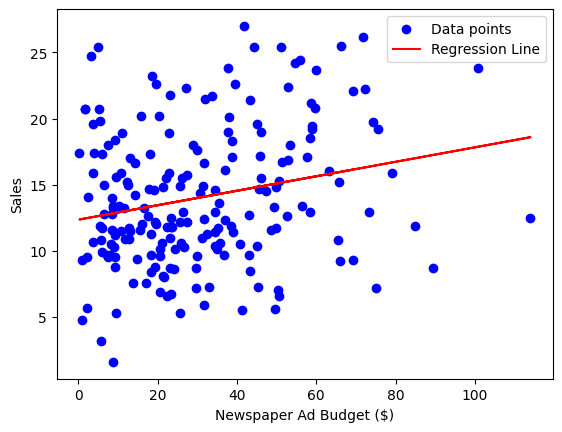

RMSE for Newspaper: 5.066953988399707
Actual Sales (first 5 for Newspaper): [22.1 10.4  9.3 18.5 12.9]
Predicted Sales (first 5 for Newspaper): [16.13616948 14.81806581 16.14163879 15.55095333 15.54548402]


In [34]:
#Q3 Repeat for Newspaper
newspaper = data["Newspaper Ad Budget ($)"].values  # Convert pandas column to numpy array
newspapermodel = LinearRegression(newspaper, sales, "Newspaper Ad Budget ($)")
newspapermodel.regression_line()
newspaper_pred = newspapermodel.predict(newspaper)
newspapermodel.plot(newspaper_pred)
print(f"RMSE for Newspaper: {newspapermodel.rmse(newspaper_pred)}")
print("Actual Sales (first 5 for Newspaper):", sales[:5])
print("Predicted Sales (first 5 for Newspaper):", newspaper_pred[:5])


In [39]:
# Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
# name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
# name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
# Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner

SyntaxError: invalid syntax (644498870.py, line 1)